## 이미지를 인식하는 원리

In [ ]:
이번부터는 딥러닝을 할 수 있는 알고리즘을 보도록 하겠습니다.
처음 보게되는 것은 컨볼루션 신경망(CNN)입니다.

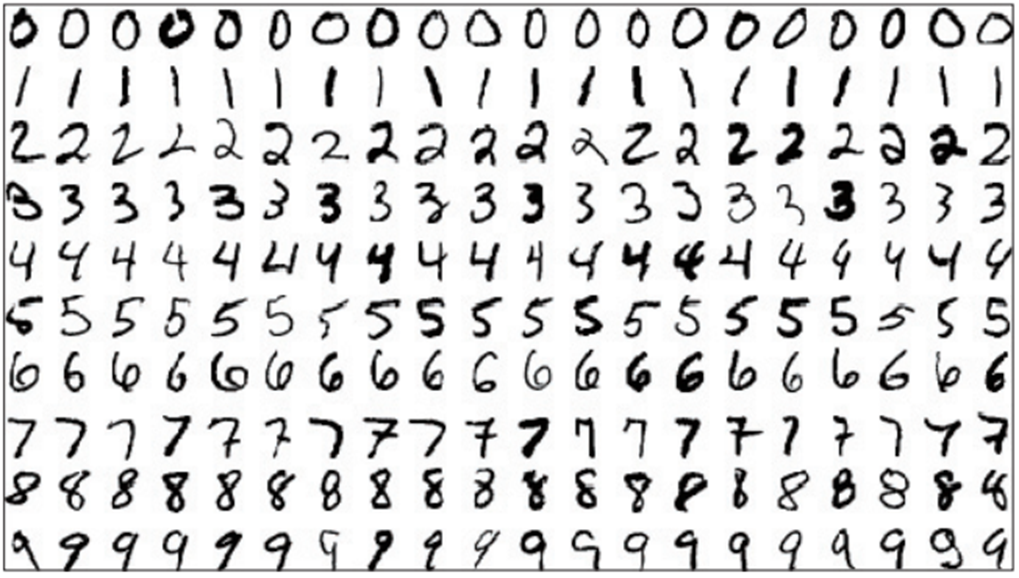<br />
이러한 손글씨를 구분하도록 하자.<br />
먼저 mnist데이터 셋을 가져온다.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

mnist는 미국 국립표준기술원(nist)에서 손글씨 숫자 이미지를 모아 만든 데이터셋 
- 숫자 5에는 5라는 값을 주고 숫자 0에는 0이라는 값을 지정해서 만들었다. 많은 숫자들을 모아둔 데이터셋 
- 이런 손글씨 같은 경우 분별하기가 어려운데 cnn이라는 기법을 사용하면 쉽게 분별할 수 있다.

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
-전체 70000개의 데이터가 모아졌다.

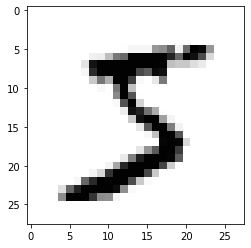

In [2]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

학습셋의 첫번째 이미지를 가져오면 5라는 숫자라는 것을 알 수 있다<br />.
이미지로 되어 있는 숫자 5인경우 5라는 것을 알아볼 수 있게 하는 것이 숙제 이다.<br />
먼저 이미지를 컴퓨터가 읽을 수 있는 과정을 거쳐야 한다.

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

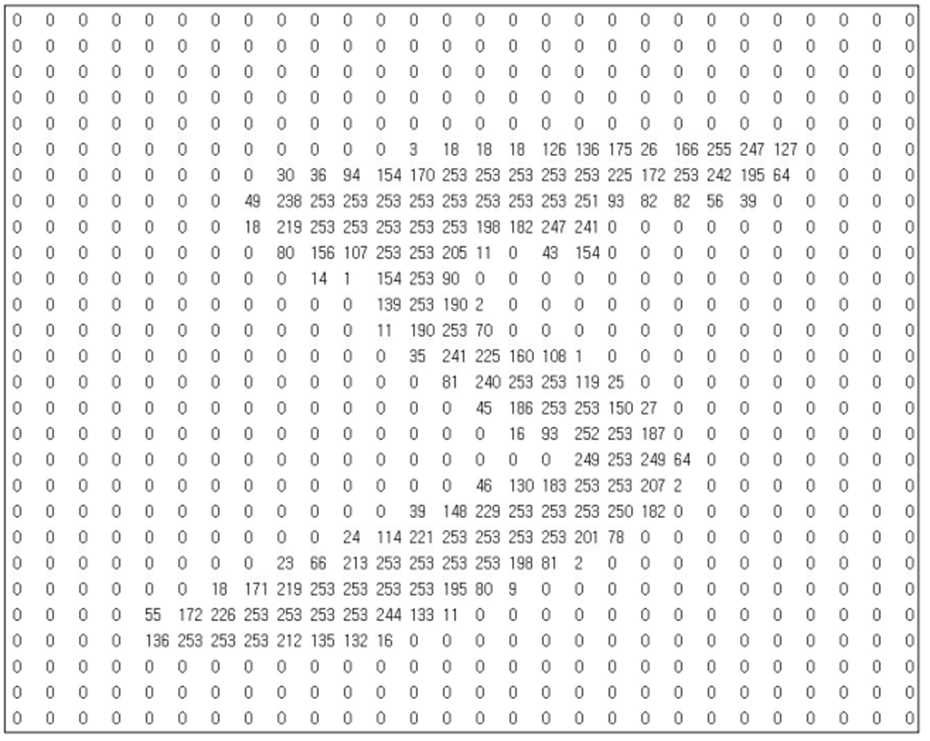<br />
색이 진할 수록 255에 가깝고 하얀색은 0이라는 것을 알 수 있다.<br />
mnist데이터셋의 실제 데이터 모양은 0부터 255로 이루어져 있는 28 * 28인 2차원배열인 속성이 되는 것이고 이것에 5라는 값을 매겨준 것이다. 

In [4]:
# 차원 변환 과정을 실습해 봅니다.                   # 가로, 세로로 되어 있는 것을 1차원배열오 만들어야 한다. 28 * 28 = 784인 1차원 배열
                                                  # X_train.shape[0]은 샘플의 갯수가 된다.(60000 개)
X_train = X_train.reshape(X_train.shape[0], 784) # reshape은 다시 배치하는 함수로 X_train에 있는 모든 2차원배열의 값들을 784열인 1차원 배열로 변경
X_train = X_train.astype('float64') # 0 ~ 1사이의 값으로 변경하기 위해서는 자료형을 실수로  변경
X_train = X_train / 255 # 0 ~ 1 사이의 값을 갖기 위해 255로 나눠준다. 이것을 정규화라고 한다.

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255 # X_test(테스트셋)도 같은 작업을 해준다.

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0])) 

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10) # 0부터 9로 이루어진 숫자를 원-핫 인코딩이 되게  to_categorical함수를 이용해서 0과1로만 이루어지게 만들어준다.
y_test = to_categorical(y_test, 10) # 0 ~ 9까지 이므로 category의 수를 10으로 줬다.

print(y_train[0]) # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]이 5의 원핫 엔코딩된 값이다.

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 일차원 배열의 크기가 784이므로 입력값은 784로 하고 은닉층의 노드의 수를 512개로 했는데 큰 의미는 없다.
model.add(Dense(10, activation='softmax')) # 10개 중에 가장 큰값 하나를 가져오는 것이므로 softmax이고 출력의 갯수가 10개이므로 출력을 10으로 한다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 여러개 중에 하나를 가져오는 것이므로 categorical_crossentropy로 해준다.

# 모델 최적화를 위한 설정구간입니다.
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 검증셋의 성능이 10이상 좋아지지 않으면 멈추고 모델을 저장

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
# 계속 실행을 하면서 더 나은 값을 저장하게 되고 10번 이상 더 나아지지 않으면 최적의 값인 것을 저장하는 것을 알 수 있다. 

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))
# 10000개의 테스트셋을 이용해서 정확도를 검증해보면 0.9816의 정확도를 가지는 것을 알 수 있다.


Epoch 00001: val_loss improved from inf to 0.18529, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00002: val_loss improved from 0.18529 to 0.13521, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00003: val_loss improved from 0.13521 to 0.11078, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00004: val_loss improved from 0.11078 to 0.10850, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00005: val_loss improved from 0.10850 to 0.09555, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00006: val_loss improved from 0.09555 to 0.09161, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00007: val_loss improved from 0.09161 to 0.08949, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00008: val_loss improved from 0.08949 to 0.08235, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00009: val_loss did not improve from 0.08235

Epoch 00010: val_loss did not improve from 0.08235

Epoch 00011: val_loss did not improve from 0.08235

Epoch 00012: val_loss did not i

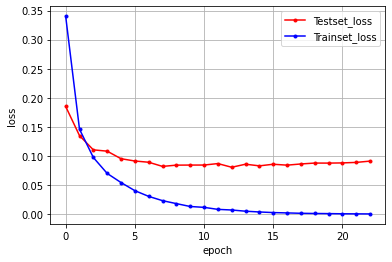

In [7]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 컨볼루션 신경망(CNN)

In [ ]:
지금까지는 딥러닝을 이용해서 학습을 시켰다. 
cnn은 방대한 데이터를 처리하기 위해 고안된 방법.
이미지 사이즈가 클 경우 이 것을 일차원으로 변경하게 되면 엄청난 리소스가 발생하게 되고 과적합 문제가 발생할 수 있게 된다.
특징을 추출해서 그 특징만을 가지고 학습을 하는 것이다. 여러개 전체를 가지고 학습을 하게되면 데이터의 크기가 너무 크기 때문에 여러개의 특징만을 이용해서 딥러닝을 한다.

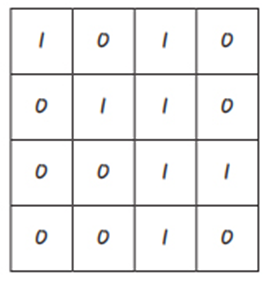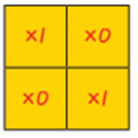 =======> 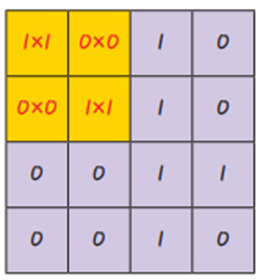

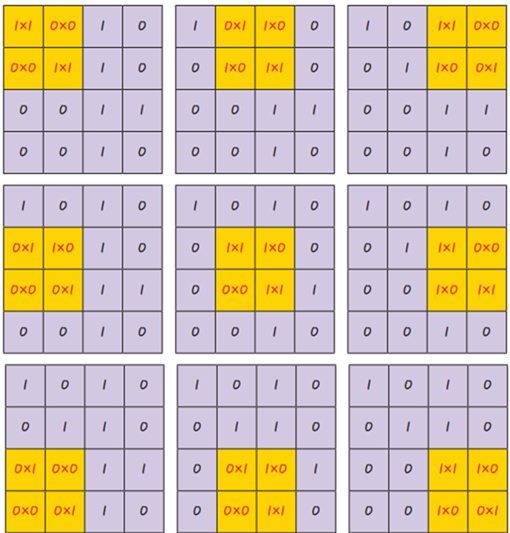 ===> 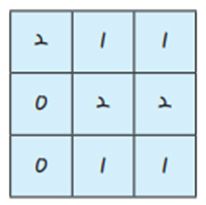

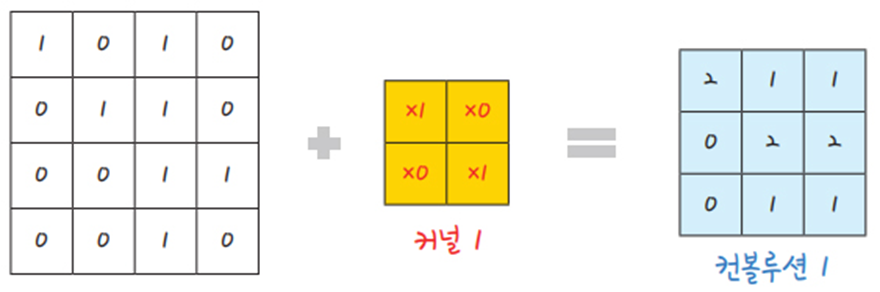

이렇게 해서 특징을 뽑아내게 되고 이러한 방법을 "컨볼루션네트워크"라고 하고 특징을 뽑아 내는 층을 컴볼루션층이라고 한다.
기존 방법에서 컨볼루션층을 추가하면 된다.
이 때 커널의 값으 1과 0으로만 이루지는 것이 아니라 임의의 값을 가진다.

아래 소스 코드에서 <br />
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) <br />
이 코드가 컨볼루션을 추가하는 것이다. => Conv2D <br />
kernel_size=(3, 3)은 3 * 3인 2차원 배열을 이야기 하는 것이고  <br />
input_shape=(28, 28, 1)는 그림의 사이즈는 28 * 28인 크기에 1은 흑백을 말하는 것이다. 칼라는 3으로 표시 . <br />
32는 컨볼루션을 몇번 만들것인지 적어준 것이다. 위 그림의 컨볼루션1이 아애 그림과 가티 n번 즉 32번 만들어지는 것이다.

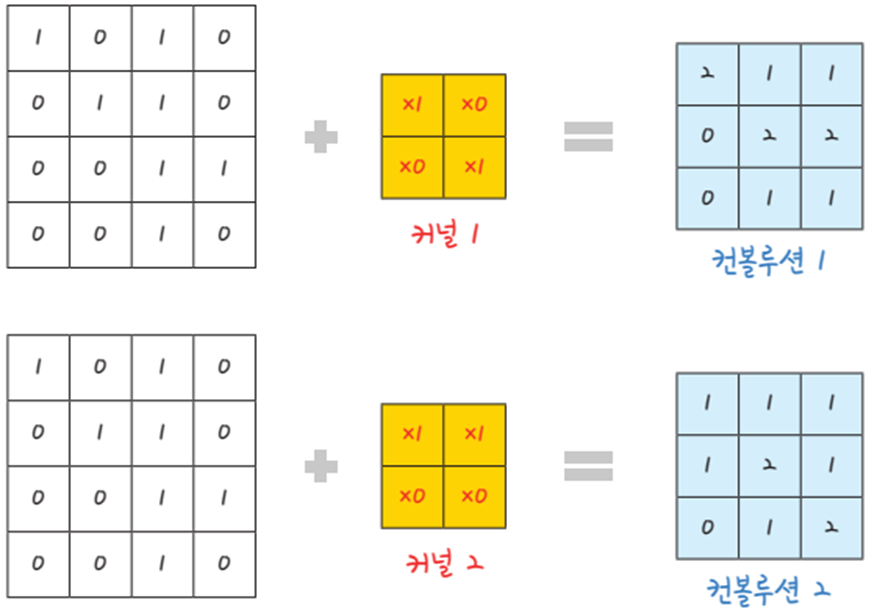<br />
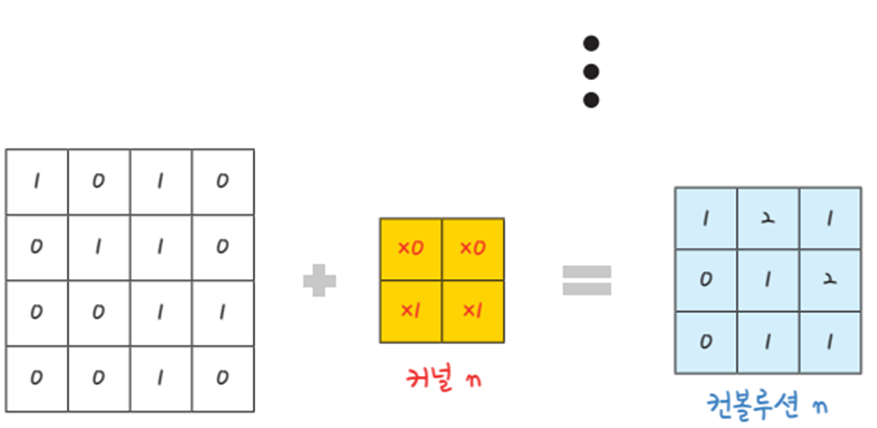

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu')) <br />
여기서는 커볼루션 64이므로 위와 같이 컨볼루션이 64개가 만드렁지는 것이다.

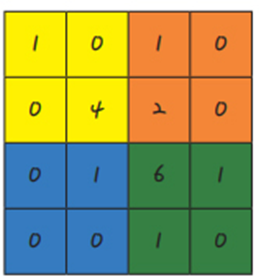 ==> 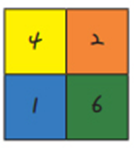<br />
위 그림과 같을 때 pool_size=(2,2)는 2 * 2사이즈로 나누어 그중 가장 큰 값만을 가져오게 하는 것을 말하는데 이것을 플링이라고 하고  MaxPooling2D를 사용하면 된다.

Conv(컨볼루션) = 사진을 여러 개의 필터로 확대경처럼 들여다보며 "특징을 뽑아내는 과정"<br />
Pooling(풀링) = 확대경으로 본 이미지에서 "핵심만 추려서 요약"하는 과정<br />
즉, Conv는 뽑기 → Pooling은 압축 이라고 이해하면 됩니다.<br />
컨볼루션으로 이미지 크기가 줄어드는 건 단순한 연산 결과고,<br />
풀링을 추가하는 이유는 계산 효율, 불변성 확보, 과적합 방지 때문입니다.<br />

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

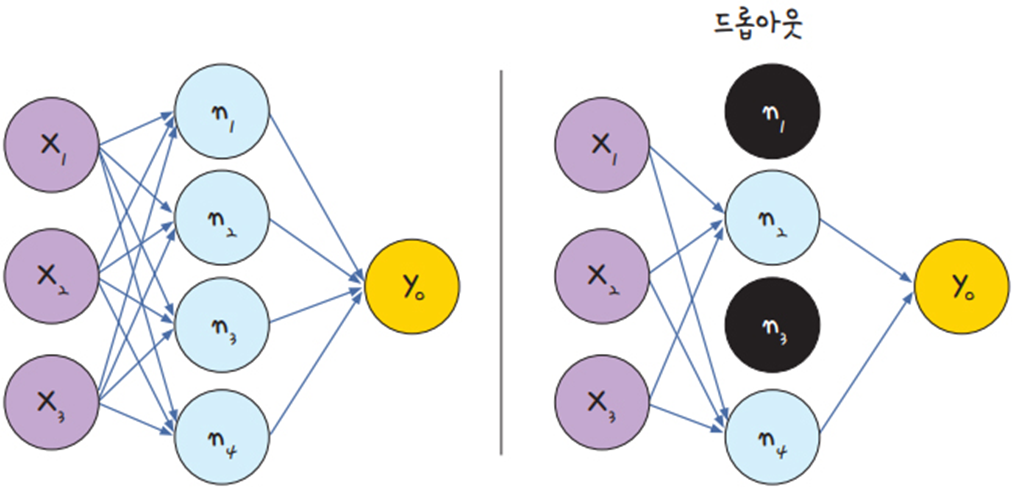

In [ ]:
Dropout(0.25)는 노드를 모두 사용하지 말고 25%의 노드를 사용하지 않게 만드는 것을 의미한다.
Dropout(0.5)는 노드를 50%는 크고 사용하겠다는 의미
노드를 전체를 사용하지 않고 일부만 사용하겠다는 것이다.
    
Flatten()는 2D 를 1D로 변경해주는 작업을 해야한다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.07661, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00002: val_loss improved from 0.07661 to 0.05954, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00003: val_loss improved from 0.05954 to 0.04875, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00004: val_loss improved from 0.04875 to 0.04668, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00005: val_loss improved from 0.04668 to 0.04307, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00006: val_loss did not improve from 0.04307

Epoch 00007: val_loss improved from 0.04307 to 0.03940, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00008: val_loss did not improve from 0.03940

Epoch 00009: val_loss did not improve from 0.03940

Epoch 00010: val_loss did not improve from 0.03940

Epoch 00011: val_loss improved from 0.03940 to 0.03780, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 00012: val_loss did not improve from 0.03780

Epoch 00013: val_loss did not improv

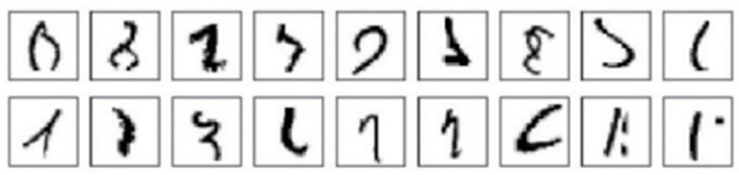
<br> 이러한 글자는 사람도 알 아보지 못했기 때문에 딥러닝 해서도 알아보지 못하기 때문에 위와 같은 그림을 제외한 99%를 알아 볼 수 있다는 것이다.

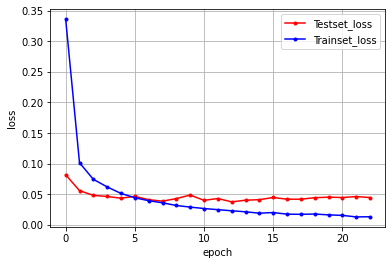

In [9]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 손글씨 예측 코드

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 이미지 불러오기 (28x28 흑백으로 변환)
img = cv2.imread("my_digit.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))   # MNIST와 동일한 크기
plt.imshow(img, cmap='gray')
plt.show()

# MNIST와 같은 전처리 (0~1 정규화, (1, 784) 형태로 reshape)
img = img.astype('float64') / 255.0
img = img.reshape(1, 784)

# 예측
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

print("예측된 숫자:", predicted_label)
print("클래스별 확률:", prediction)

# 28* 28인 사이즈인 아무런 이미지로 예측하면 숫자가 아니어도 예측을 하려고 한다.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# PIL로 이미지 열기
img = Image.open("my_digit.png").convert("L")  # 흑백 변환
img = img.resize((28, 28))  # MNIST 크기 맞추기

plt.imshow(img, cmap="gray")
plt.show()

# numpy 변환 + 전처리
img = np.array(img).astype("float64") / 255.0
img = img.reshape(1, 784)

# 예측
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

print("예측된 숫자:", predicted_label)
print("클래스별 확률:", prediction)